# Import Necessary Libraries

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [487]:
used_cars_data = pd.read_csv("used_cars_data-1.csv")
used_cars_data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


# Check the shape of the dataset

In [488]:
used_cars_data.shape

(7253, 14)

# Get the info regarding column datatypes

In [489]:
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


# The above output shows that there are missing values in 5 out of the 14 columns

In [490]:
# Sum of missimg values in each of the columns
used_cars_data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

# Cleaning the Mileage column

In [491]:
# Inspecting the unique values in the 'Mileage' column
# used_cars_data['Mileage'].unique()

In [492]:
# Fill missing Mileage column with the mode Mileage
mode_mileage = used_cars_data['Mileage'].mode()

In [493]:
used_cars_data["Mileage"] = used_cars_data["Mileage"].fillna(mode_mileage)

# Cleaning the Engine column

In [494]:
# Inspecting the unique values in the 'Engine' column
# used_cars_data['Engine'].unique()

In [495]:
# Fill missing Engine column with the mode Engine
mode_engine = used_cars_data['Engine'].mode()

In [496]:
mode_engine

0    1197 CC
Name: Engine, dtype: object

In [497]:
used_cars_data["Engine"] = used_cars_data["Engine"].fillna(mode_engine)

# Cleaning Power column

In [498]:
# Inspecting the unique values in the 'Power' column
# used_cars_data['Power'].unique()

In [499]:
# Fill missing Power with the mode Engine
mode_power = used_cars_data['Power'].mode()

In [500]:
mode_power

0    74 bhp
Name: Power, dtype: object

In [501]:
used_cars_data["Power"] = used_cars_data["Power"].fillna(mode_power)

# Cleaning Seats column

In [502]:
# Inspecting the unique values in the 'Seats' column
used_cars_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [503]:
# Fill missing Seats column with the median Seats
median_seats = used_cars_data['Seats'].median()

In [504]:
median_seats

5.0

In [505]:
used_cars_data["Seats"] = used_cars_data["Seats"].fillna(median_seats)

# Cleaning the Price column

In [506]:
# Inspecting the unique values in the 'Price' column
# used_cars_data['Price'].unique()

In [507]:
# Fill missing Price column with the median Price
median_price = used_cars_data['Price'].median()

In [508]:
median_price

5.64

In [509]:
used_cars_data["Price"] = used_cars_data["Price"].fillna(median_price)

In [510]:
used_cars_data.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                175
Seats                  0
New_Price              0
Price                  0
dtype: int64

# The above output shows that there are no more null values in the dataframe

In [511]:
# Get summary statistics for the numerical columns
used_cars_data.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7253.000000,7253.000000,7253.000000
mean,3626.000000,2013.365366,5.869906e+04,5.277678,21.307322,8.826235
std,2093.905084,3.254421,8.442772e+04,0.809039,24.256314,10.293313
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.850000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,8.400000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


# Exploratory Data Analysis

# Univariate Analysis

<Axes: xlabel='Price', ylabel='Count'>

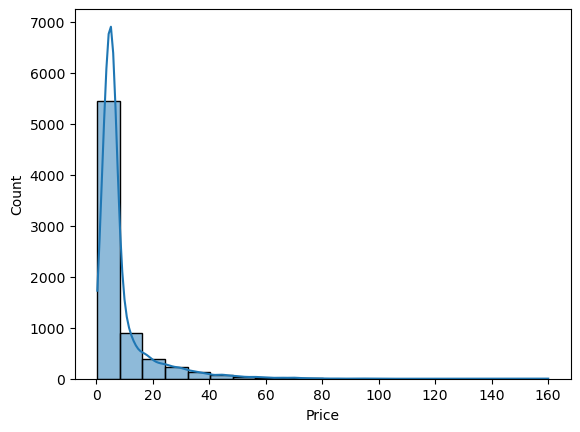

In [512]:
sns.histplot(used_cars_data["Price"], bins = 20,
kde = True)

# The above plot is normally distributed

<Axes: xlabel='New_Price', ylabel='Count'>

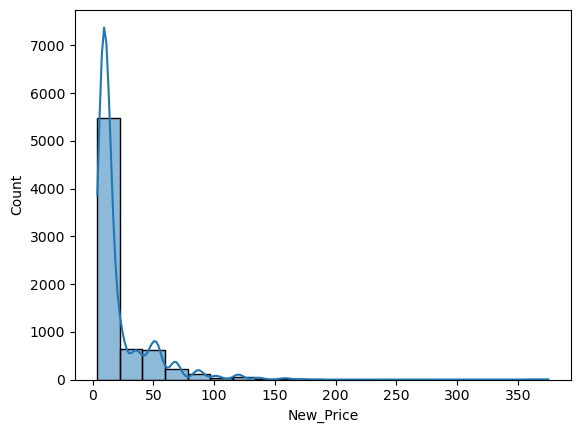

In [513]:
sns.histplot(used_cars_data["New_Price"], bins = 20,
kde = True)

<Axes: xlabel='Seats', ylabel='Count'>

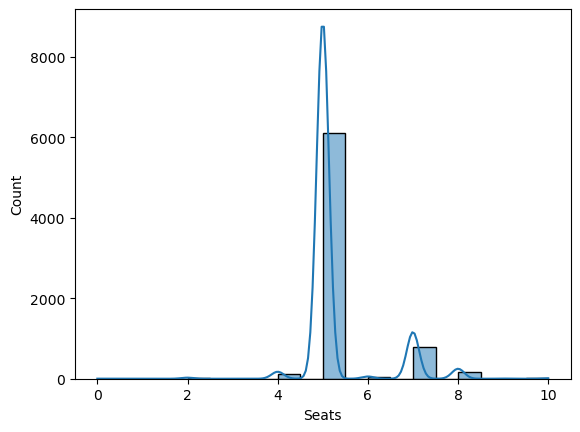

In [514]:
sns.histplot(used_cars_data["Seats"], bins = 20,
kde = True)

<Axes: xlabel='Power', ylabel='Count'>

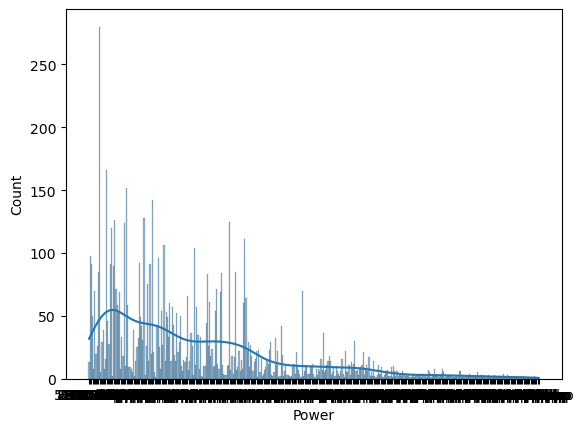

In [515]:
sns.histplot(used_cars_data["Power"], bins = 20,
kde = True)

<Axes: xlabel='Engine', ylabel='Count'>

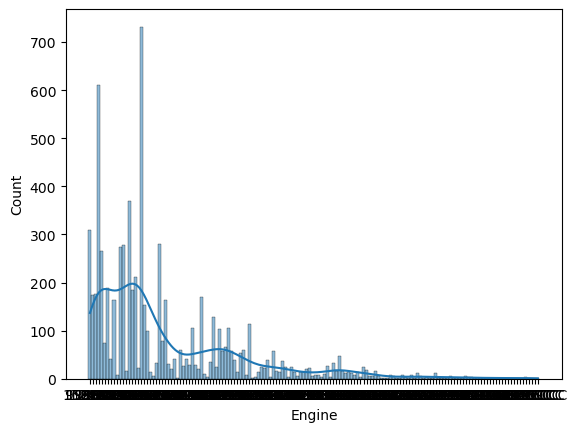

In [516]:
sns.histplot(used_cars_data["Engine"], bins = 20,
kde = True)

<Axes: xlabel='Mileage', ylabel='Count'>

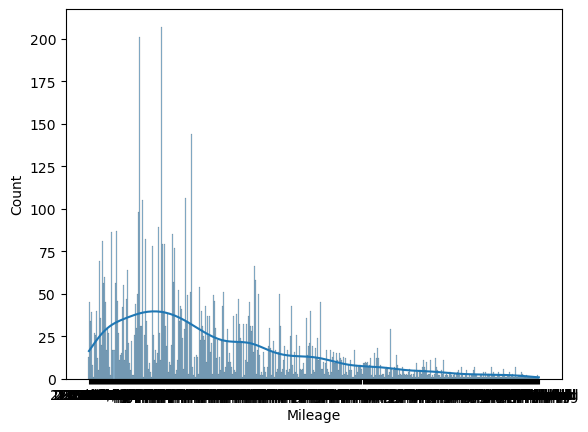

In [517]:
sns.histplot(used_cars_data["Mileage"], bins = 20,
kde = True)

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

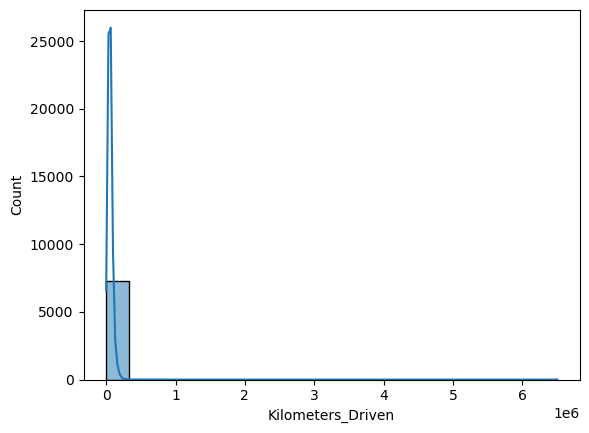

In [518]:
sns.histplot(used_cars_data["Kilometers_Driven"], bins = 20,
kde = True)

<Axes: xlabel='Year', ylabel='Count'>

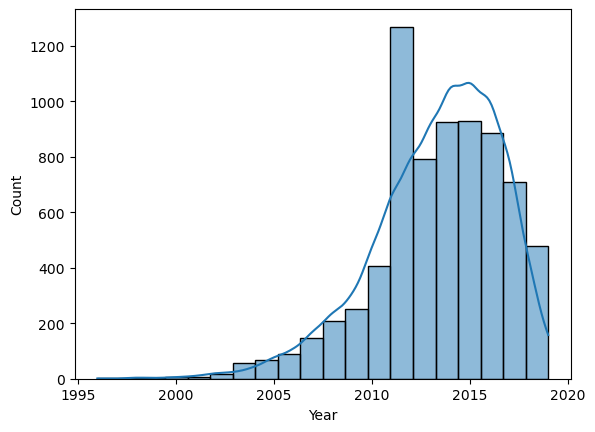

In [519]:
sns.histplot(used_cars_data["Year"], bins = 20,
kde = True)

# Scatter plots between the variables and the target

<Axes: xlabel='Year', ylabel='Price'>

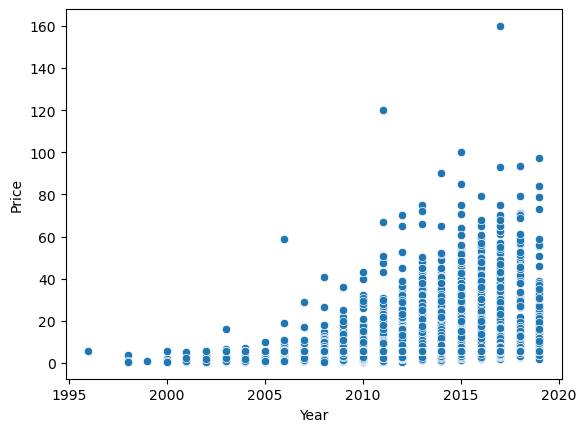

In [520]:
sns.scatterplot(data = used_cars_data, x = "Year",
y = "Price")

<Axes: xlabel='Kilometers_Driven', ylabel='Price'>

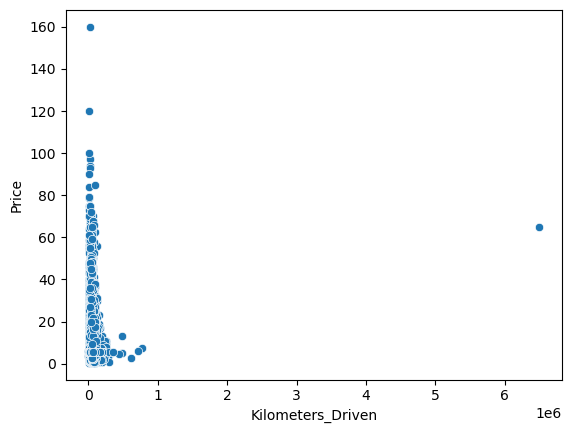

In [521]:
sns.scatterplot(data = used_cars_data, x = "Kilometers_Driven",
y = "Price")

<Axes: xlabel='Mileage', ylabel='Price'>

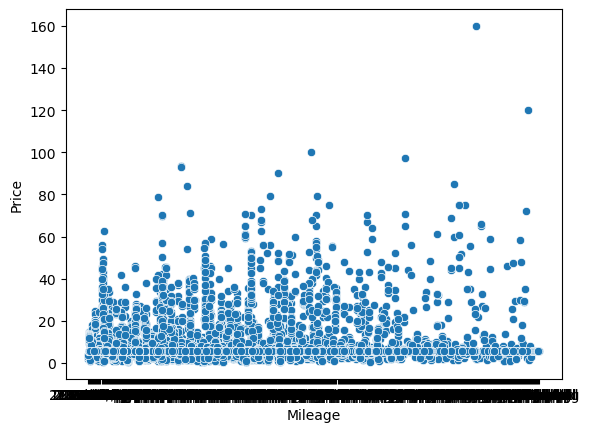

In [522]:
sns.scatterplot(data = used_cars_data, x = "Mileage",
y = "Price")

<Axes: xlabel='Engine', ylabel='Price'>

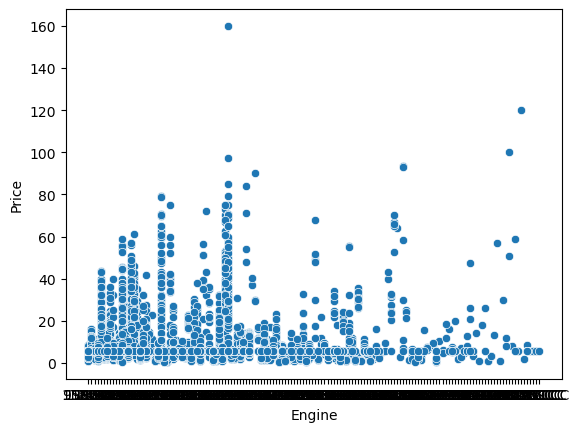

In [523]:
sns.scatterplot(data = used_cars_data, x = "Engine",
y = "Price")

In [524]:
mat_corr = used_cars_data.corr()

ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

# Split the dataset

In [ ]:
# select features needed for building the models
X = used_cars_data.drop(["Price"], axis=1)
y = used_cars_data["Price"]

In [ ]:
X.head()

In [525]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
7248     5.64
7249     5.64
7250     5.64
7251     5.64
7252     5.64
Name: Price, Length: 7253, dtype: float64

In [526]:
# import the function to split the data
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [527]:
# check the dimension of the train and test data
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (5802, 13)
Testing shape: (1451, 13)


In [528]:
# standardize the training and test data
from sklearn.preprocessing import MinMaxScaler

In [529]:
# create an instance of the scaler class
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Hyundai Creta 1.6 SX'